In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from qbstyles import mpl_style

In [5]:
data = pd.read_csv('../data/Advertising.csv')

In [6]:
data['total_spend'] = data['TV'] + data['radio'] + data['newspaper']

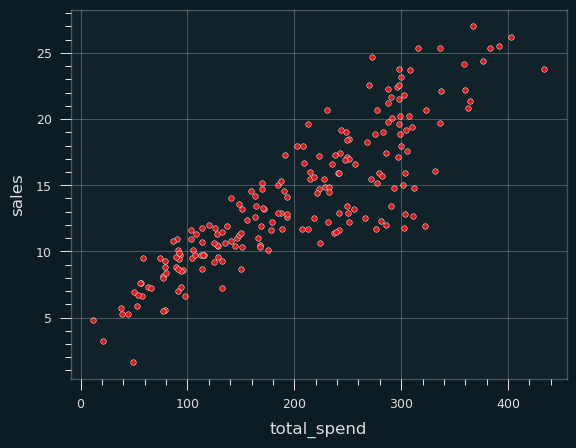

In [28]:
#Let's see the relationship between the total amount of money spent in advertising with sales
mpl_style(True)
sns.scatterplot(data = data, x = 'total_spend', y = 'sales')
plt.show();

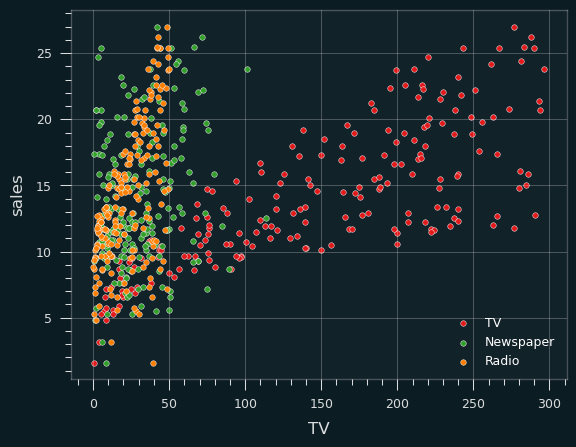

In [23]:
#Let's plot the relationship between each type of advertising with sales
mpl_style(True)
sns.scatterplot(data = data, x = 'TV', y = 'sales', label = 'TV')
sns.scatterplot(data = data, x = 'newspaper', y = 'sales', label = 'Newspaper')
sns.scatterplot(data = data, x = 'radio', y = 'sales', label = 'Radio')

plt.legend(frameon=False,loc='best')
plt.show();

### In this part we're going to separate the independent variables from the target variable (sales) and perform train - test split in order to train the linear regression model

In [29]:
X = data.drop(['total_spend','sales'], axis = 1)
y = data['sales']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [31]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
predictions = lin_reg.predict(X_test)

In [36]:
root_mse = np.sqrt(mean_squared_error(y_test, predictions))

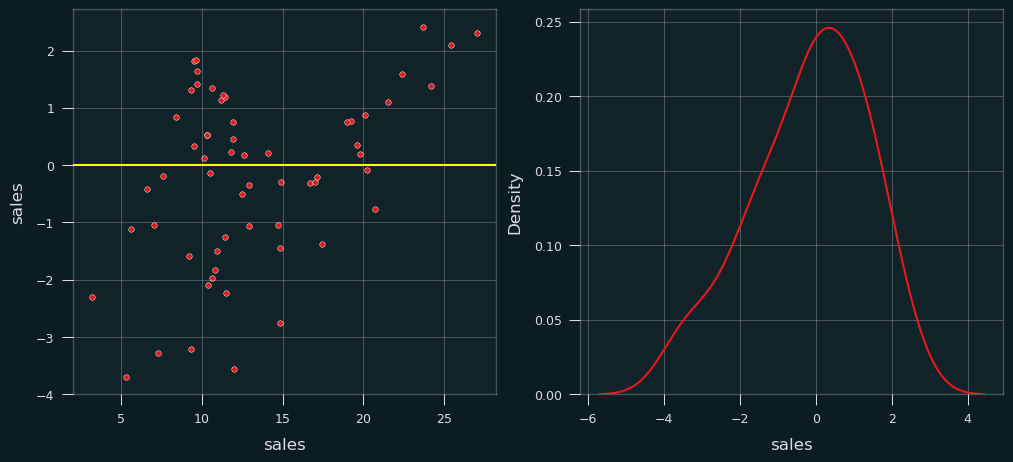

In [73]:
errors = y_test - predictions

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.scatterplot(x = y_test, y = errors)
plt.axhline(y = 0, color = 'yellow')

plt.subplot(1,2,2)
sns.kdeplot(errors);

In [75]:
import scipy as sp

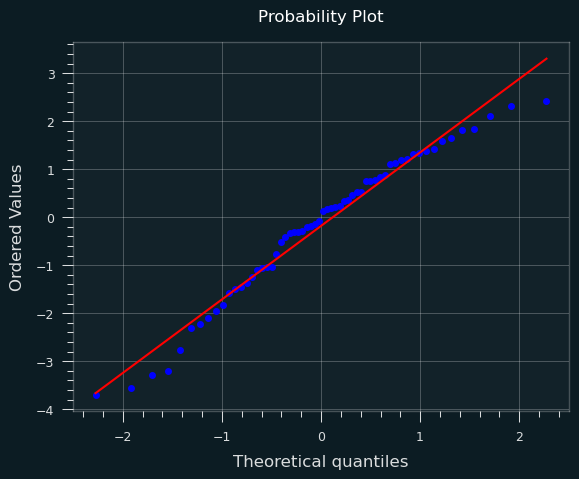

In [80]:
ax = plt.subplot(1,1,1)
sp.stats.probplot(errors, plot = ax);